15.081203616460288


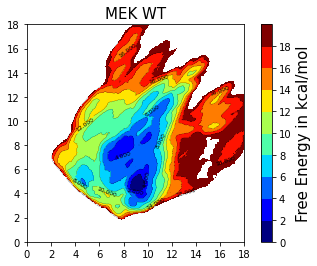

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 21 17:30:07 2019

@author: keshavpatil
"""

# This code reads the fes.dat file generated by PLUMED 
# and plots the contour plot for free energy, if there are only two
# collective variables.
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


with open('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/free_ener_wt/8us/fes_8us_wt_mintozero.dat') as f:
    
    lines = f.readlines()
    
    
    
#lines = lines[9:2659]

new_lines = []    
# Get rid of empty lines
for line in lines:
    # Strip whitespace, should leave nothing if empty line was just "\n"
    if not line.strip():
        continue
    # We got something, save it
    else:
        new_lines.append(line)
        
lines = new_lines[9:]
    
bin_size_active = 201 # This was set in the PLUMED simulation
bin_size_inactive = 201
x = []
y1 = [] # stores the active coordinates
y2 = [] # stores the inactive coordinates
z1 = []
z = np.zeros((1,bin_size_inactive))
for i in range(0,len(lines)):
    
    words = lines[i].split()
    int_lst = [float(x) for x in words]
   
    y1.append(int_lst[0]) #y1 takes in active rmsd coordinates
    y2.append(int_lst[1]) #y2 takes in inactive rmsd coordinates
    z1.append(int_lst[2])  #z takes the free energy
 
            
y1 = np.array(y1)
y2 = np.array(y2)

y1 = y1[0:bin_size_inactive]
y2 = y2[0:len(lines):bin_size_inactive]



# making a 2-D matrix z
for i in range(0,len(z1),bin_size_active):
    z = np.r_[z,[z1[i:i+bin_size_active]]] 


# deleting the first row of all zeros in z
z = np.delete(z, (0), axis=0)

#z = z[::-1]
x,y = np.meshgrid(y1,y2)




x_c_set = []
y_c_set = []

#ACTIVE COORDINATE
for i in range(60+1,95):
    bin_width1 = (y1.max() - y1.min()) / (bin_size_active)
    x_c = y1[0] + (i) * bin_width1
    x_c_set.append(x_c)

    
#INACTIVE COORDINATE
for j in range(160+1,190):
    bin_width2 =  (y2.max() - y2.min()) / (bin_size_inactive)
    y_c =  y2[0] + (j) * bin_width2
    y_c_set.append(y_c)



zz = np.array([i[60+1:95] for i in z[160+1:190]])
f = 16
# # # that particular zone
x11,y11 = np.meshgrid(x_c_set,y_c_set)

# # #getting the particular region within that "zone" which is below 5 Kcal/mol
zzz = np.ma.masked_where((0 < zz) & (zz < f), zz)
q = np.where(zzz.mask)

x_c_subset = []
y_c_subset = []


  
for u in range(0,len(q[1])):
    r = q[0][u]
    c = q[1][u]
    x_c_subset.append(x11[r][c])
    y_c_subset.append(y11[r][c])
    
    
y_c_subset = np.array(y_c_subset)    
x_c_subset = np.array(x_c_subset)
#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='brown', edgecolors='brown',label='zone 1')

# computing the free energy of the state: F_st = -(1/beta)log (Σ exp(-beta F(x,y)))
#beta = 1/K_b T = 1/0.6 = 1.66
sum_exp = 0.0

for i in range(0,zz.shape[0]):
    for j in range(0,zz.shape[1]):
        if 0 <= zz[i][j] <= f:
            sum_exp = sum_exp + np.exp(-1.66 * zz[i][j])

sum_exp = sum_exp * (bin_width1) * (bin_width2)         
F_st = -(0.6) * np.log(sum_exp)

print(F_st)
        
#masking the overall matrix z 

                        
z =np.ma.masked_where((20 < z) & (z < 100), z)
contours = plt.contour( x,y,z,10, colors='black',linewidths=0.2)
plt.clabel(contours, inline=True, fontsize=6)
cmap = plt.cm.get_cmap("jet", 10)
cax = plt.imshow(z, extent=[min(y1), max(y1), min(y2), max(y2)], origin='lower',
          cmap=cmap)#,ylabel='kkk')


cbar = plt.colorbar(cax, ticks=[0,2,4,6,8,10,12,14,16,18,20])
cbar.ax.set_yticklabels(['0','2','4','6','8','10','12','14','16','18','20'])
#plt.clim(z.min(),z.max())

#plt.scatter(x_c_subset, y_c_subset, s=0.2, facecolors='darkorchid', edgecolors='darkorchid',label='zone 8')
#comap = plt.colorbar()
cbar.set_label('Free Energy in kcal/mol', rotation=90,fontsize=15 )   
plt.title('MEK WT',fontsize=15)
xx = [i for i in range(0,19,2)]
plt.xticks(xx)
plt.ylim((0,18))
plt.xlim((0,18))


plt.savefig('zone_final.png', bbox_inches = 'tight', dpi = 300)

plt.show()


x_bin_number = []
y_bin_number = []
for i in range(0,len(x_c_subset)):
    x_bin_num = np.math.ceil((x_c_subset[i] - y1.min())/bin_width1)
    x_bin_number.append(x_bin_num)
    
for i in range(0,len(y_c_subset)):
    y_bin_num = np.math.ceil((y_c_subset[i] - y2.min())/bin_width2)
    y_bin_number.append(y_bin_num)


x_c_subset_bin = np.array(x_bin_number)
y_c_subset_bin = np.array(y_bin_number)
#np.savetxt('x_c_subset_bin_zone8.txt', x_c_subset_bin)
#np.savetxt('y_c_subset_bin_zone8.txt', y_c_subset_bin)

